In [1]:
from datascience import *
import numpy as npy

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
top = Table.read_table('top_movies_by_title.csv')
top.set_format([2,3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
101 Dalmatians,Disney,"144,880,014","869,280,100",1961
2001: A Space Odyssey,MGM,"56,954,992","377,027,700",1968
9 to 5,Fox,"103,290,500","334,062,200",1980
A Star Is Born (1976),Warner Bros.,"80,000,000","326,760,600",1976
Air Force One,Sony,"172,956,409","327,752,300",1997
Airport,Universal,"100,489,151","575,168,200",1970
Aladdin,Buena Vista (Disney),"217,350,219","456,248,400",1992
Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010
American Graffiti,Universal,"115,000,000","571,714,300",1973
American Sniper,Warner Bros.,"350,126,372","374,796,000",2014


In [3]:
#Use the group method to count how many times a categorical variable appears in a column
top.group('Studio').sort("count", descending=True)

Studio,count
Warner Bros.,29
Buena Vista (Disney),29
Fox,26
Paramount,25
Universal,22
Disney,11
Columbia,10
MGM,7
UA,6
Sony,6


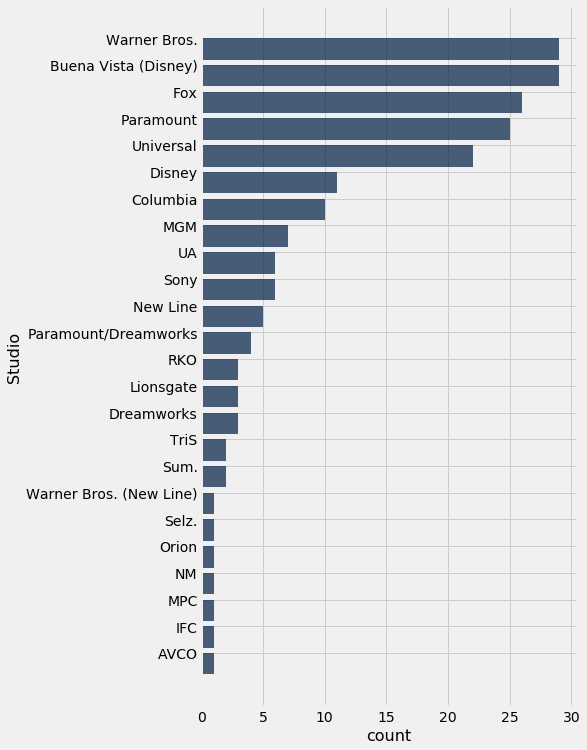

In [4]:
#How many of the top movies did each studio produce?
top.group('Studio').sort("count", descending=True).barh('Studio','count')

In [5]:
#How old are each of these movies?
aged = top.with_column("Age", 2018-top.column('Year'))

In [6]:
aged

Title,Studio,Gross,Gross (Adjusted),Year,Age
101 Dalmatians,Disney,"144,880,014","869,280,100",1961,57
2001: A Space Odyssey,MGM,"56,954,992","377,027,700",1968,50
9 to 5,Fox,"103,290,500","334,062,200",1980,38
A Star Is Born (1976),Warner Bros.,"80,000,000","326,760,600",1976,42
Air Force One,Sony,"172,956,409","327,752,300",1997,21
Airport,Universal,"100,489,151","575,168,200",1970,48
Aladdin,Buena Vista (Disney),"217,350,219","456,248,400",1992,26
Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010,8
American Graffiti,Universal,"115,000,000","571,714,300",1973,45
American Sniper,Warner Bros.,"350,126,372","374,796,000",2014,4


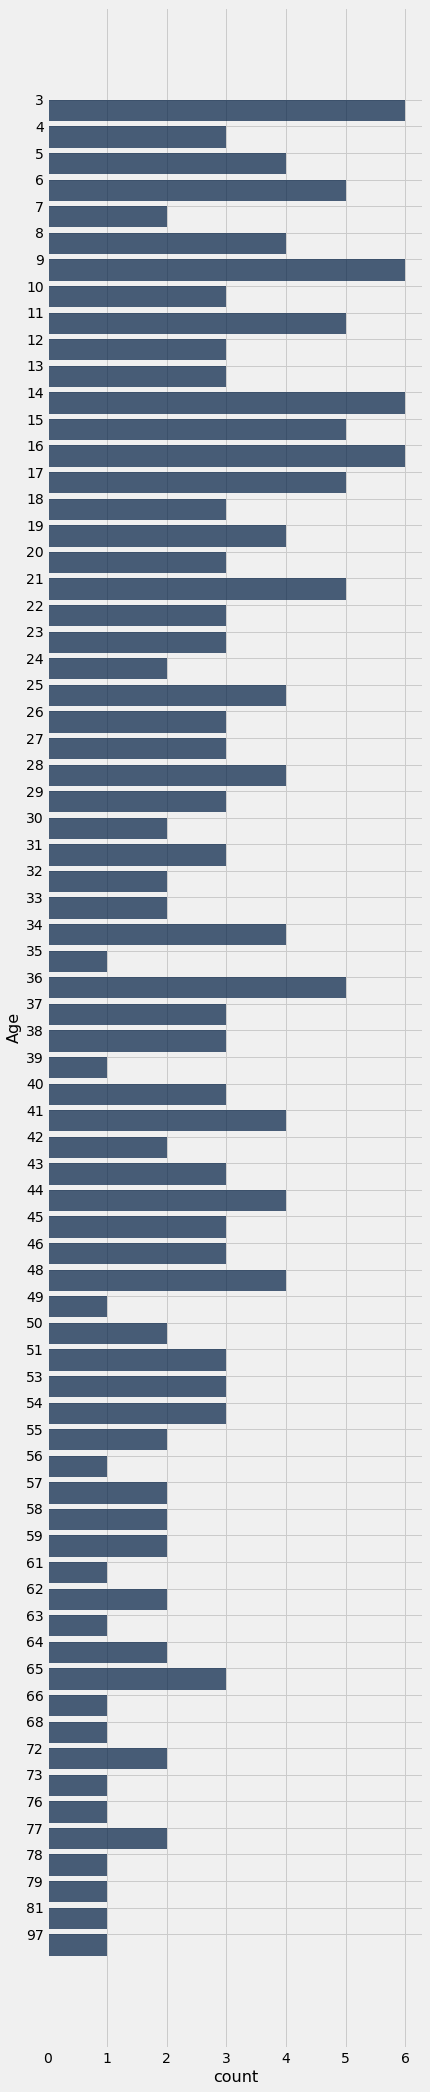

In [7]:
#How many movies of each age are there?
aged.group('Age').barh('Age','count')

In [8]:
aged.group('Age')

Age,count
3,6
4,3
5,4
6,5
7,2
8,4
9,6
10,3
11,5
12,3


In [9]:
#The bin method groups numbers into 10 equally spaced bins
aged.bin('Age').show()

bin,Age count
3,41
12.4,40
21.8,30
31.2,24
40.6,24
50,20
59.4,11
68.8,7
78.2,2
87.6,1


In [10]:
#You can ask the bin method to use any bins you like
aged.bin('Age', bins=[0,20,40,60,80,100])

bin,Age count
0,73
20,59
40,47
60,19
80,2
100,0


In [11]:
#defining arrays with less typing
npy.arange(0, 101, 20)

array([  0,  20,  40,  60,  80, 100])

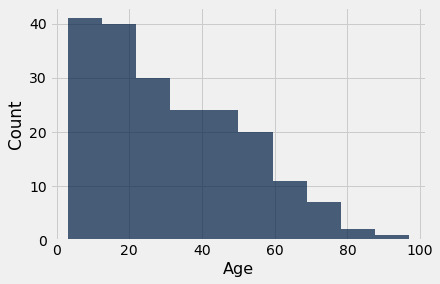

In [12]:
aged.hist('Age', normed = False)

In [13]:
#overlaid graphs and scatterplots
heights = Table.read_table('galton.csv')

In [14]:
heights

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [15]:
heights = heights.where('gender', 'female').select('father', 'mother', 'childHeight').relabeled(2, 'daughter')
heights

father,mother,daughter
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,65.5
75.5,66.5,65.5
75,64,68
75,64,67
75,64,64.5
75,64,63
75,58.5,66.5


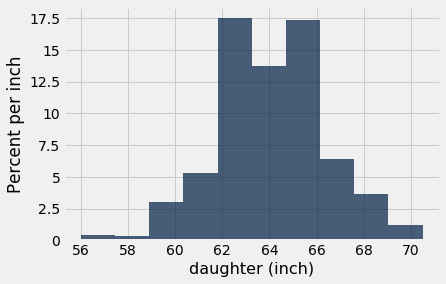

In [16]:
heights.hist('daughter', unit = 'inch')

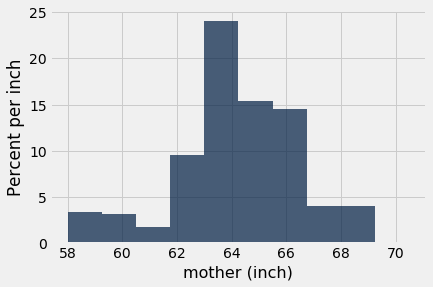

In [17]:
heights.hist('mother', unit = 'inch')

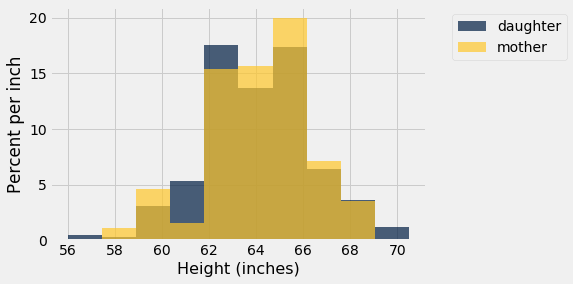

In [18]:
#overlaying daughter and mother heights
heights.hist('daughter', 'mother', unit='inch')
_ = plots.xlabel('Height (inches)')

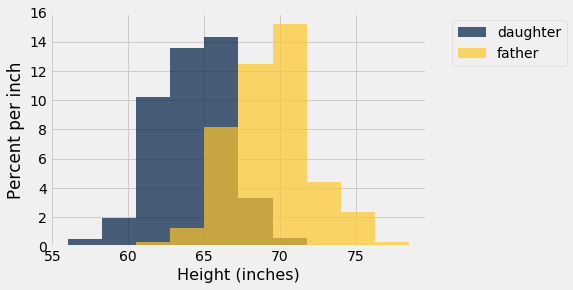

In [19]:
heights.hist('daughter', 'father', unit='inch')
_ = plots.xlabel('Height (inches)')

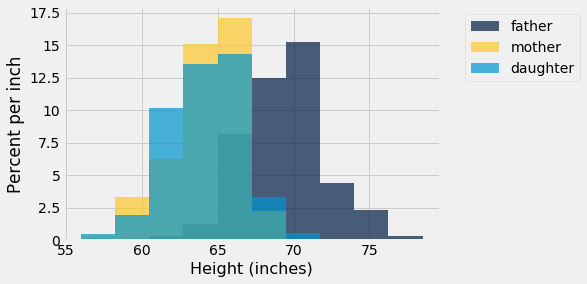

In [20]:
heights.hist(unit='inch')
_ = plots.xlabel('Height (inches)')

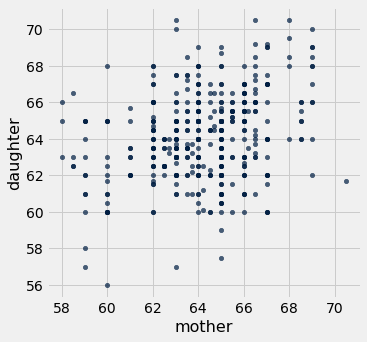

In [21]:
#scatterplots
heights.scatter('mother','daughter')

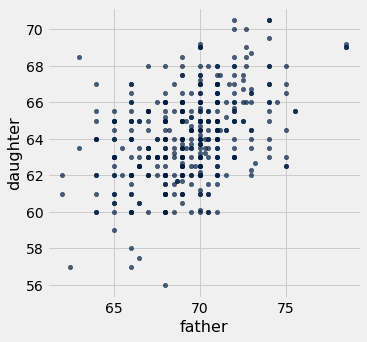

In [22]:
heights.scatter('father','daughter')

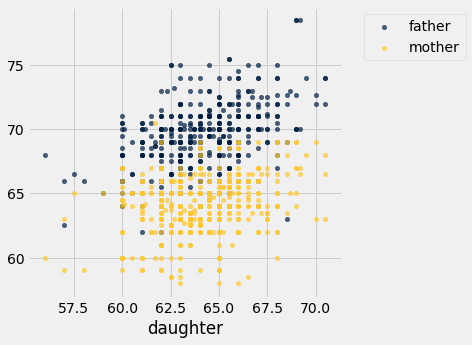

In [24]:
#putting it all together
heights.scatter('daughter')